In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",parse_dates = True, index_col=0)

*index_col=0* Toma la primera columna como índice.

*parse_dates = True* Intenta analizar el índice como fecha y hora de forma predeterminada

## Coeficiente de asimetría de Fisher

El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra $\{x_1,x_2,...,x_n \}$,  la fórmula del coeficiente de asimetría de Fisher es:

\begin{equation*}
\gamma_1=\frac{\sum_{i=1}^n (x_i-\overline{x})^3}{n s^3}.
\end{equation*}



Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.


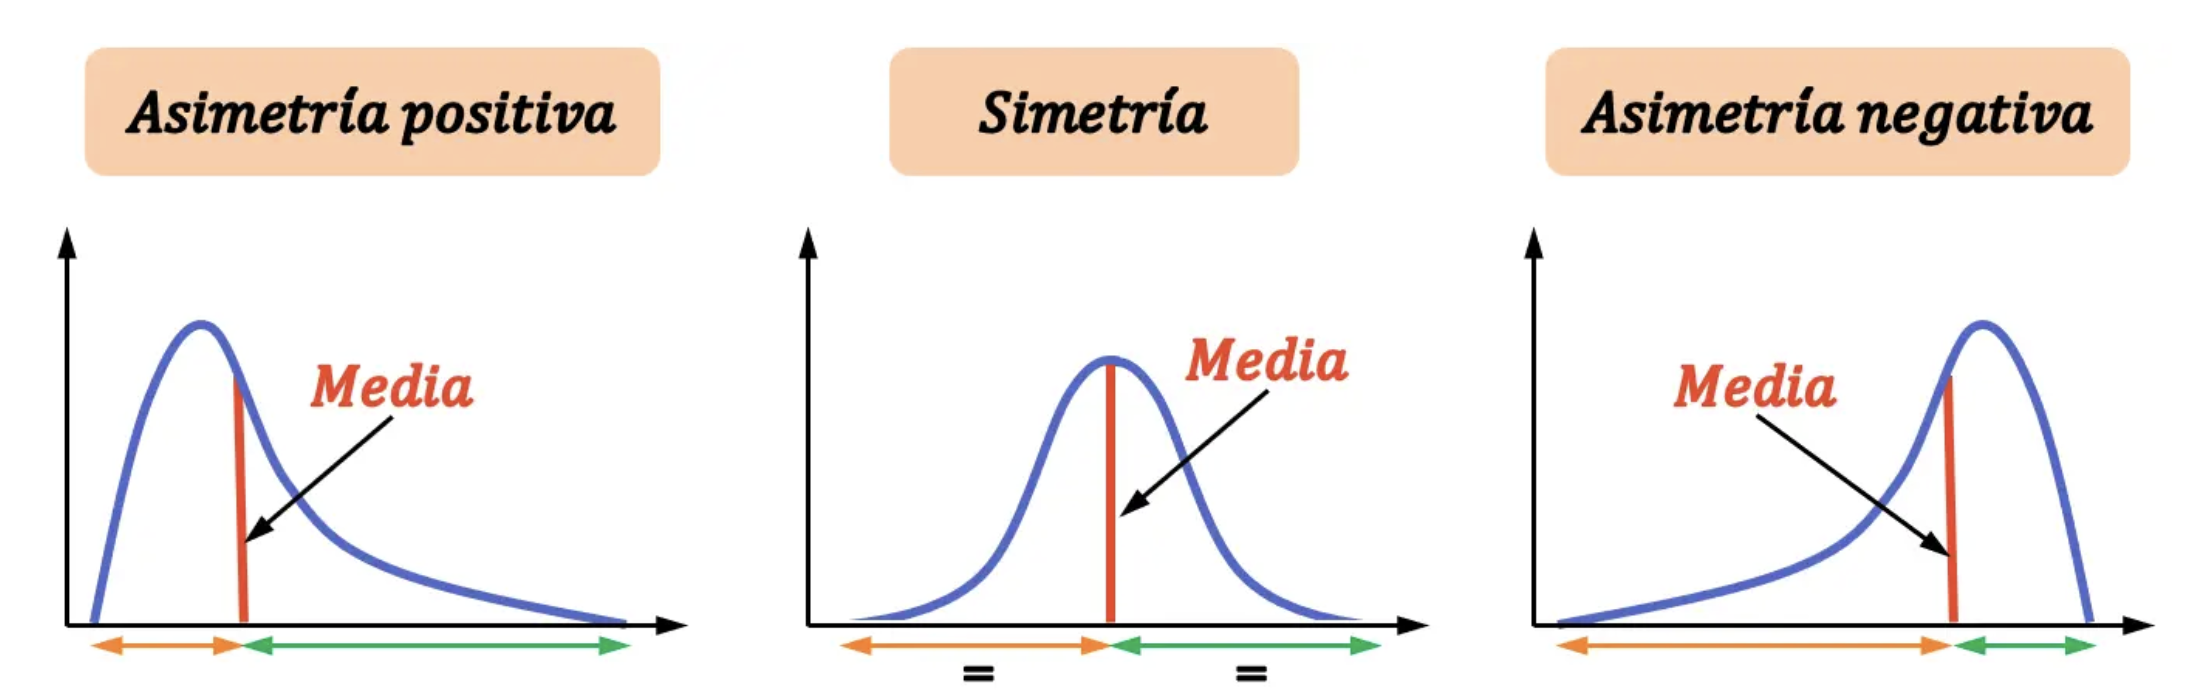

* Si $\gamma_1>0$, la distribución es asimétrica positiva.


* Si $\gamma_1<0$, la distribución es asimétrica negativa.

#### 1. Encuentra el coeficiente de asimetría de los contaminantes.

In [6]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of                   CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976  44.165505  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   
...              ...        ...        ...        ...        ...         ...   
2023-05-27  0.256722   3.750583  17.284351  21.629371  41.580645   36.774011   
2023-05-28  0.286826   3.458886  16.349241  20.230769  36.913761   28.580000   
2023-05-29  0.482077  11.448113  24.521154  36.436321  29.697068   30.241486   
2023-05-30  0.441455  13.893519  22.615530  37.224537  36

La **curtosis (Kurtosis)** define en qué  grado las colas de la distribución difieren de las colas de una distribución normal.  Dada una muestra $\{x_1,x_2,...,x_n \}$,  el coeficiente de curtosis  se define como: 

\begin{equation*}
\beta_2=\frac{\sum_{i=1}^n (x_i-\overline{x})^4}{n s^4}.
\end{equation*} 

Donde, $\overline{x}$ y $s$ son la media y desviación estandar muestrales.

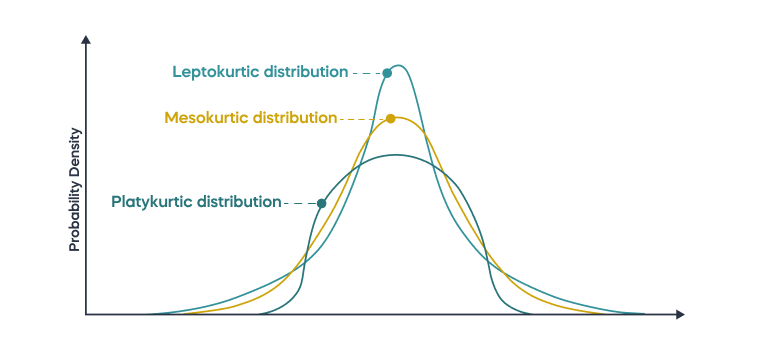

* Si $\beta_2>0$,  la distribución es leptocúrtica (distribución con colas más largas que la normal).


* Si $\beta_2=0$, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).


* Si $\beta_2<0$, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [4]:
df.kurt()

CO       1.683262
NO       2.462188
NO2      1.428723
NOX      1.776258
O3       0.038129
PM10     0.314006
PM25     5.184911
SO2     10.735611
dtype: float64

<AxesSubplot:xlabel='SO2', ylabel='Count'>

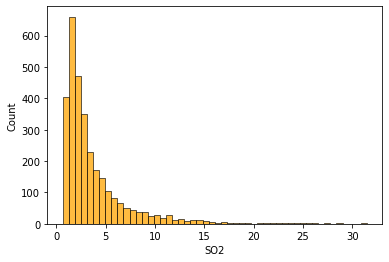

In [11]:
sns.histplot(df['SO2'], bins=50, color='orange')

## Prueba de normalidad de Shapiro-Wilk

La prueba de Shapiro-Wilk  se usa para contrastar la normalidad de un conjunto de datos. Se plantea como hipótesis nula que una muestra proviene de una población normalmente distribuida. Se considera uno de las pruebas más potentes para el contraste de normalidad. 
El estadístico de la prueba es: 

\begin{equation}
    W = \frac{(\sum_{i=1}^n a_i x_{(i)})^2}{\sum_{i=1}^n (x_i - \overline{x})^2}
\end{equation}

Donde $x_{(i)}$ es el número que ocupa la i-ésima posición de la muestra (ordenada de forma ascendente), $\overline{x}$ es la media muestral y 


\begin{equation*}
(a_1,...,a_n)= \frac{m^T V^{-1}}{( m^T V^{-1} V^{-1}m)^\frac{1}{2}}.
\end{equation*}

Donde $m=(m_1,...,m_n)^T$,  siendo $m_1,...,m_n$ los valores medios del estadístico ordenado, de variables aleatorias independientes e identicamente distribuidas, muestreadas de distribuciones normales y $V$ denota la matriz de covarianzas de ese estadístico de orden.

Se establecen dos hipótesis que se deberán contrastar: 

* Hipótesis nula ($H_0$): la muestra está distribuida normalmente. 

* Hipótesis alternativa ($H_1$): la muestra no está distribuida normalmente. 

Sea $\alpha = 0.05$. Aceptamos la $H_0$ siempre y cuando el $p$-valor de esta prueba estadística  sea mayor que 0.05. Aceptamos la $H_1$ cuando el $p$-valor de la prueba sea menor que 0.05. 

 En [1], se encontró que la prueba de normalidad de Shapiro-Wilk es más potente para diferentes tamaños de muestra, que otras pruebas de normalidad, tales como la prueba de Kolmogorov-Smirnov, la prueba de Lilliefors y prueba de Anderson-Darling. Sin embargo, el poder de la prueba de Shapiro-Wilk aún es bajo para un tamaño de muestra pequeño ($n <50$).

[1] Razali, N. and Wah, Y., *Power Comparisons of Shapiro-Wilk, Kolmogorov-Smirnov, Lilliefors and Anderson-Darling Tests*, Journal of Statistical Modeling and Analytics, Vol. 2, No. 1, (2011), 21-33. 

#### 2. Realiza la prueba de S-W a los contaminantes.

In [17]:
from scipy.stats import shapiro

estadistico, p_value =shapiro(df['PM10'])

print('Valor del Estadistico=%.3f, p_value=%.2f' % (estadistico, p_value))

Valor del Estadistico=0.978, p_value=0.00


# Correlación

La correlación es una medida de la relación lineal entre dos variables cuantitativas contínuas (x, y). La manera más sencilla de saber si dos variables están correlacionadas es determinar si co-varían (varían conjuntamente). La correlación es en esencia una medida de asociación lineal entre dos variables. Esta medida o índice de correlación $r$ puede variar entre -1 y +1, ambos extremos indicando correlaciones perfectas, negativa y positiva respectivamente. El índice $r$ es una medida del tamaño del efecto, que suele interpretarse de la siguiente manera:

* correlación despreciable: $r < |0.1|$
* correlación baja: $|0.1| < r \leq |0.3|$
* correlación mediana : $|0.3| < r \leq |0.5|$
* correlación fuerte o alta: $r > |0.5|$






## Coeficiente de correlación de Pearson

El coeficiente de correlación de Pearson es una prueba que mide la relación estadística entre dos variables continuas. Dados $n$ pares de datos $\{(x_i,y_i) \}_{i\leq n}$,  se define el coeficiente de correlación muestral de Pearson como 

$$
r_{xy}=\frac{\sum_{i=1}^n (x_{i} - \overline{x}) (x_{i} - \overline{y})    }{\sqrt{\sum_{i=1}^n (x_{i} - \overline{x})^2} \sqrt{\sum_{i=1}^n (y_{i} - \overline{y})^2}}.
$$

Donde $n$ es el tamaño de la muestra, $\overline{x}$ y $\overline{y}$ son las medias muestrales de $\{x_i \}_{i\leq n}$ y $\{y_i \}_{i\leq n}$, respectivamente.

Suposiciones vinculadas al uso del coeficiente de correlación de Pearson:

* Es necesario las dos variables sean medidas a un nivel cuantitativo continuo. 

* La distribución de las variables deben ser semejantes a la curva normal.


## Coeficiente de correlación de Spearman

El coeficiente de correlación de Spearman $\rho$, es una medida de la correlación entre dos variables aleatorias. Esta es una medida no paramétrica de la correlación de rango. Se utiliza principalmente en el análisis de datos para medir la relación entre dos variables.
Para calcular $\rho$, los datos son ordenados y reemplazados por su respectivo orden. Este coeficiente se expresa como sigue:

\begin{equation*}
    \rho=1-\frac{6\sum d^2}{N(N^2-1)}
\end{equation*}

donde $d$ es la diferencia entre los correspondientes estadísticos de orden de $X$ y $Y$.  $N$ es el número de parejas de datos.

Una gran ventaja de la prueba de correlación de Spearman es que no importa si las variables tiene una distribución normal, y en lugar de trabajar con los valores originales de los datos, la correlación de Spearman se calcula a partir de los rangos de los datos.

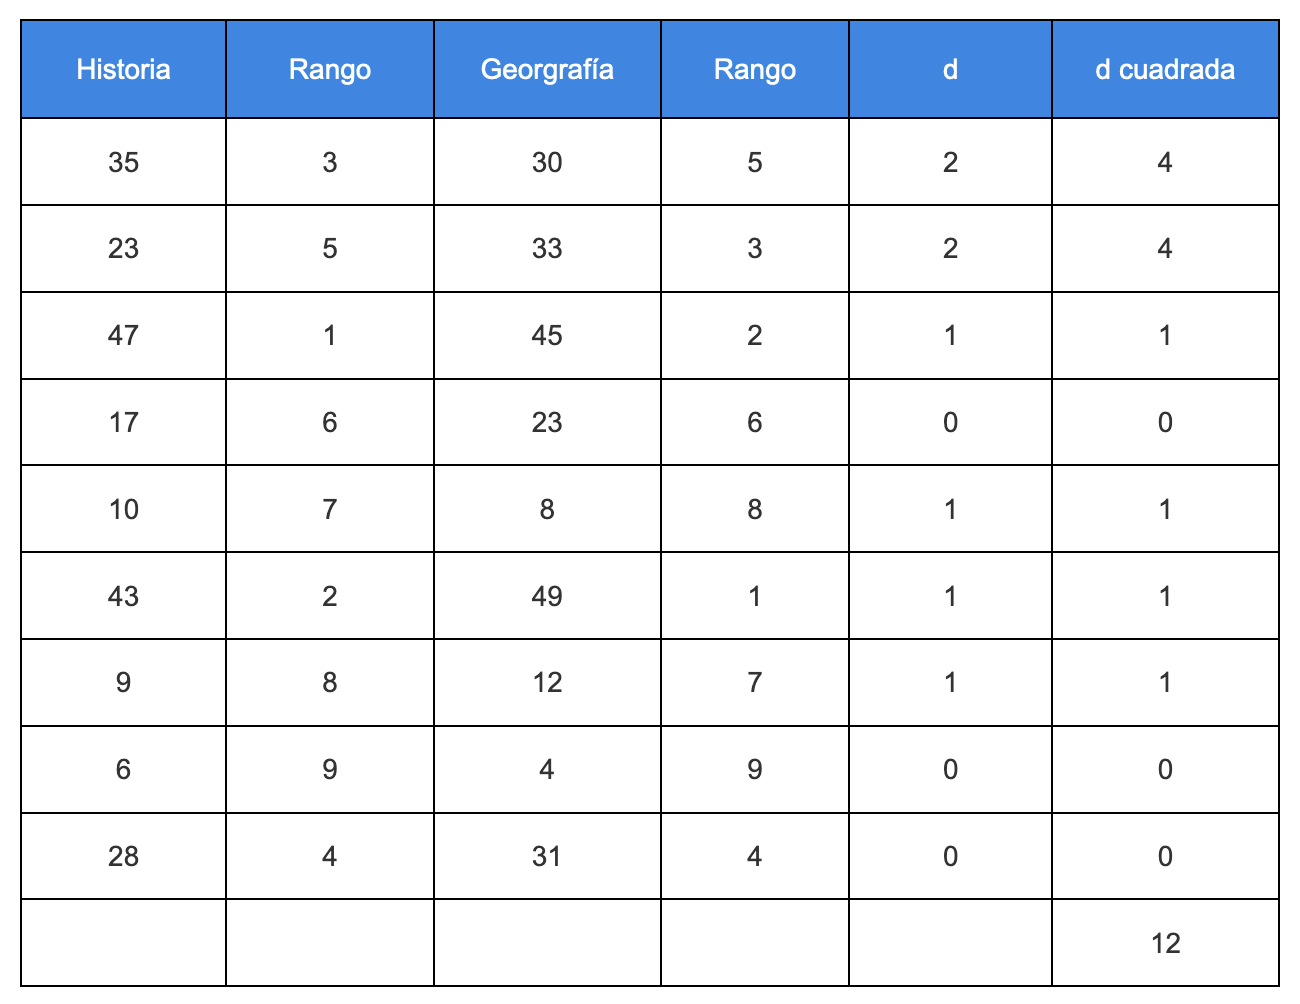

In [18]:
H=[35,23,47,17,10,43,9,6,28]
G=[30,33,45,23,8,49,12,4,31]

In [27]:
H=sorted(H, reverse=True)
G=sorted(G, reverse=True)

In [28]:
print(H)
print(G)

[47, 43, 35, 28, 23, 17, 10, 9, 6]
[49, 45, 33, 31, 30, 23, 12, 8, 4]


#### 3. Encuentre la correlación entre los contaminantes e ilustra esto mediante un gráfico.

colores cmap: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [29]:
correlation_matrix= df.corr('spearman')

In [30]:
correlation_matrix

CO        NO       NO2       NOX        O3      PM10      PM25  \
CO    1.000000  0.792279  0.844874  0.854311 -0.057146  0.525460  0.540627   
NO    0.792279  1.000000  0.801656  0.959736 -0.213371  0.539598  0.402232   
NO2   0.844874  0.801656  1.000000  0.932275  0.064124  0.695687  0.693741   
NOX   0.854311  0.959736  0.932275  1.000000 -0.088925  0.646696  0.560590   
O3   -0.057146 -0.213371  0.064124 -0.088925  1.000000  0.408806  0.462961   
PM10  0.525460  0.539598  0.695687  0.646696  0.408806  1.000000  0.858762   
PM25  0.540627  0.402232  0.693741  0.560590  0.462961  0.858762  1.000000   
SO2   0.377411  0.328189  0.476221  0.411711  0.093813  0.548739  0.547311   

           SO2  
CO    0.377411  
NO    0.328189  
NO2   0.476221  
NOX   0.411711  
O3    0.093813  
PM10  0.548739  
PM25  0.547311  
SO2   1.000000

<AxesSubplot:>

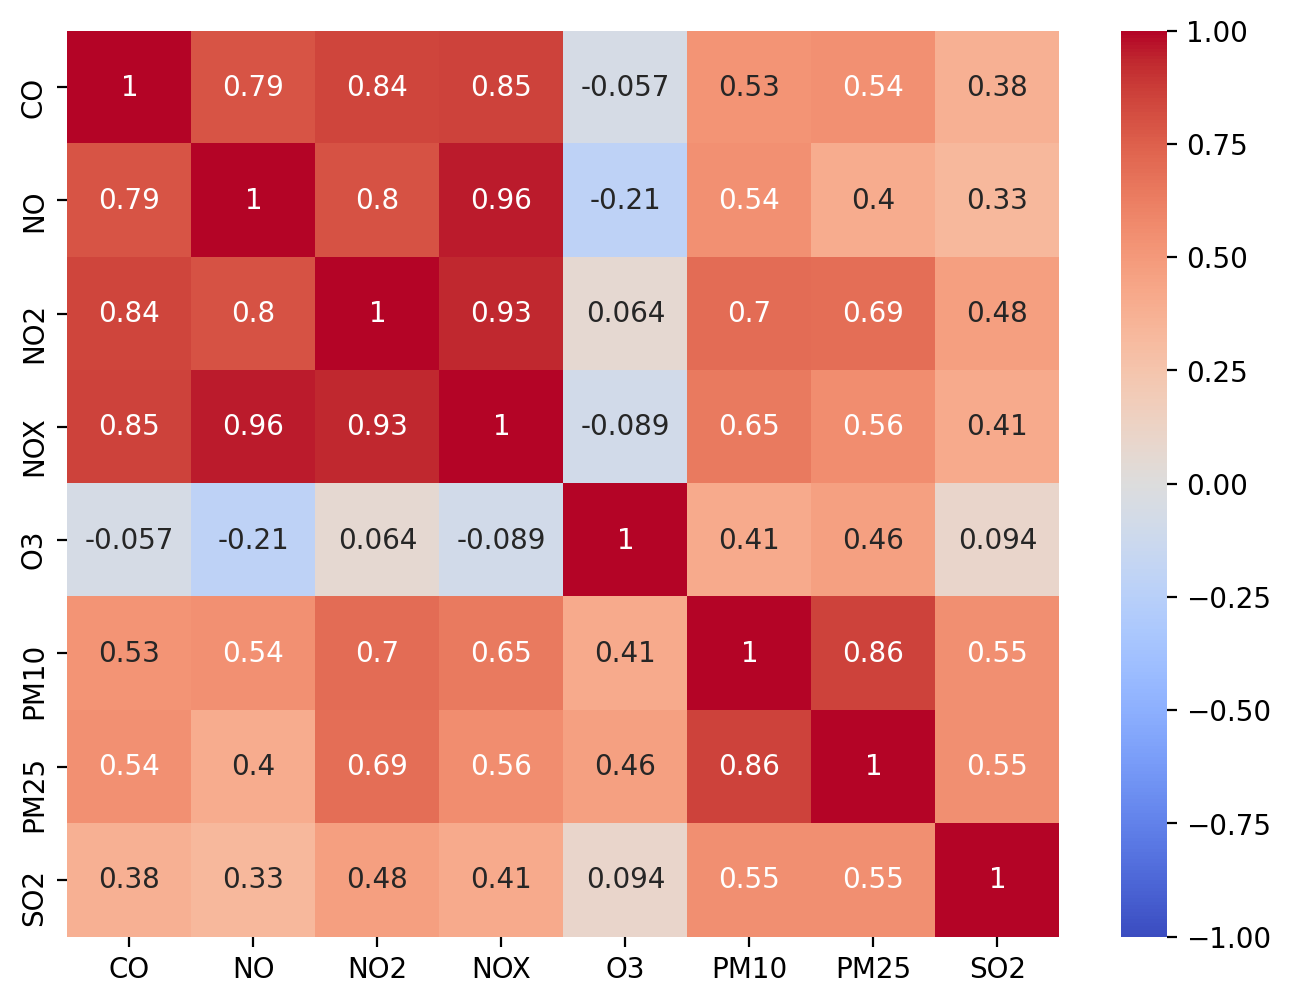

In [37]:
plt.figure(figsize=(8,6),dpi=200)
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0)

#### 4. Obtenga un Dataframe con los contaminantes que tengan una correlación alta en orden descendente. Y los diagramas de dispersión entre todos los contaminantes.

In [2]:
import pingouin as pg

ImportError: cannot import name 'studentized_range' from 'scipy.stats' (C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\__init__.py)

In [1]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [6]:
corr=pg.pairwise_corr(df,method='spearman')

NameError: name 'pg' is not defined

In [7]:
corr.sort_values(by='r',ascending=False)[['X','Y','r']]

NameError: name 'corr' is not defined

In [8]:
A=corr.sort_values(by='r',ascending=False)[['X','Y','r']]
A=A[(A['r']>0.5) | (A['r']<-0.5)]
A

NameError: name 'corr' is not defined

# Factores meteorológicos

La Red de Meteorología y Radiación Solar (REDMET) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de temperatura (TMP), humedad relativa (RH), dirección del viento (WDR) y la velocidad del viento (WSP).

https://datos.cdmx.gob.mx/dataset/redmet

## ¿Existe una correlación entre los contaminantes y los factores meteorológicos?

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df2 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv",parse_dates = True, index_col=0)

In [9]:
df2

RH        TMP         WDR       WSP
fecha                                                 
2015-01-01  60.565476  13.385714  156.723039  1.933333
2015-01-02  52.452381  13.567262  176.710784  2.559804
2015-01-03  55.763636  13.893333  190.830846  2.136318
2015-01-04  62.776786  12.536012  196.306373  2.592647
2015-01-05  70.271845   9.070227  266.889764  2.963517
...               ...        ...         ...       ...
2023-05-27  51.899130  19.453565  190.198664  2.187646
2023-05-28  59.949565  17.375826  183.542571  2.092154
2023-05-29  58.837743  17.039153  169.527919  1.952284
2023-05-30  50.145719  18.684699  184.998255  1.978709
2023-05-31  50.353261  20.089130  172.697917  1.962153

[3073 rows x 4 columns]

In [11]:
from scipy.stats import shapiro

estadistico, p_value =shapiro(df2['RH'])

print('Valor del Estadistico=%.3f, p_value=%.3f' % (estadistico, p_value))

Valor del Estadistico=0.985, p_value=0.000


In [14]:
cm=pd.concat([df,df2],axis=1)

In [15]:
cm

CO         NO        NO2        NOX         O3        PM10  \
fecha                                                                          
2015-01-01  1.050696  22.765528  24.225155  46.987578  23.175150  105.573684   
2015-01-02  0.807585  32.249608  21.554160  53.800628  17.268366   36.687845   
2015-01-03  0.640755  21.686916  19.394081  41.071651  15.486486   29.269022   
2015-01-04  0.726940  24.606272  19.560976  44.165505  17.329032   39.961538   
2015-01-05  0.530815  11.443182  20.990260  32.439935  14.470588   31.855643   
...              ...        ...        ...        ...        ...         ...   
2023-05-27  0.256722   3.750583  17.284351  21.629371  41.580645   36.774011   
2023-05-28  0.286826   3.458886  16.349241  20.230769  36.913761   28.580000   
2023-05-29  0.482077  11.448113  24.521154  36.436321  29.697068   30.241486   
2023-05-30  0.441455  13.893519  22.615530  37.224537  36.185971   35.859532   
2023-05-31  0.340404   5.353066  19.372583  25.710359  47.860972   42.203390   

                 PM25        SO2         RH        TMP         WDR       WSP  
fecha                                                                         
2015-01-01  78.953405  11.554723  60.565476  13.385714  156.723039  1.933333  
2015-01-02  15.449438   1.895052  52.452381  13.567262  176.710784  2.559804  
2015-01-03  12.915129   1.436937  55.763636  13.893333  190.830846  2.136318  
2015-01-04  16.838284   1.809061  62.776786  12.536012  196.306373  2.592647  
2015-01-05  12.667774   8.315789  70.271845   9.070227  266.889764  2.963517  
...               ...        ...        ...        ...         ...       ...  
2023-05-27  21.170139   2.735683  51.899130  19.453565  190.198664  2.187646  
2023-05-28  18.454861   2.331658  59.949565  17.375826  183.542571  2.092154  
2023-05-29  16.692857   1.071588  58.837743  17.039153  169.527919  1.952284  
2023-05-30  20.888525   1.181818  50.145719  18.684699  184.998255  1.978709  
2023-05-31  24.787097   1.402083  50.353261  20.089130  172.697917  1.962153  

[3073 rows x 12 columns]

In [16]:
correlation_matrix1= cm.corr('spearman')

In [17]:
correlation_matrix1

CO        NO       NO2       NOX        O3      PM10      PM25  \
CO    1.000000  0.792279  0.844874  0.854311 -0.057146  0.525460  0.540627   
NO    0.792279  1.000000  0.801656  0.959736 -0.213371  0.539598  0.402232   
NO2   0.844874  0.801656  1.000000  0.932275  0.064124  0.695687  0.693741   
NOX   0.854311  0.959736  0.932275  1.000000 -0.088925  0.646696  0.560590   
O3   -0.057146 -0.213371  0.064124 -0.088925  1.000000  0.408806  0.462961   
PM10  0.525460  0.539598  0.695687  0.646696  0.408806  1.000000  0.858762   
PM25  0.540627  0.402232  0.693741  0.560590  0.462961  0.858762  1.000000   
SO2   0.377411  0.328189  0.476221  0.411711  0.093813  0.548739  0.547311   
RH   -0.067802 -0.241475 -0.226508 -0.260025 -0.499820 -0.641513 -0.335398   
TMP  -0.287982 -0.337510 -0.297271 -0.333623  0.567159 -0.009700  0.047023   
WDR  -0.192637 -0.188687 -0.219576 -0.213510 -0.301023 -0.258122 -0.253989   
WSP  -0.511768 -0.439267 -0.607549 -0.535938  0.073998 -0.222692 -0.410820   

           SO2        RH       TMP       WDR       WSP  
CO    0.377411 -0.067802 -0.287982 -0.192637 -0.511768  
NO    0.328189 -0.241475 -0.337510 -0.188687 -0.439267  
NO2   0.476221 -0.226508 -0.297271 -0.219576 -0.607549  
NOX   0.411711 -0.260025 -0.333623 -0.213510 -0.535938  
O3    0.093813 -0.499820  0.567159 -0.301023  0.073998  
PM10  0.548739 -0.641513 -0.009700 -0.258122 -0.222692  
PM25  0.547311 -0.335398  0.047023 -0.253989 -0.410820  
SO2   1.000000 -0.175965 -0.217537  0.023894 -0.290918  
RH   -0.175965  1.000000 -0.234813  0.188309 -0.199130  
TMP  -0.217537 -0.234813  1.000000 -0.187151  0.297481  
WDR   0.023894  0.188309 -0.187151  1.000000  0.202887  
WSP  -0.290918 -0.199130  0.297481  0.202887  1.000000

<AxesSubplot:>

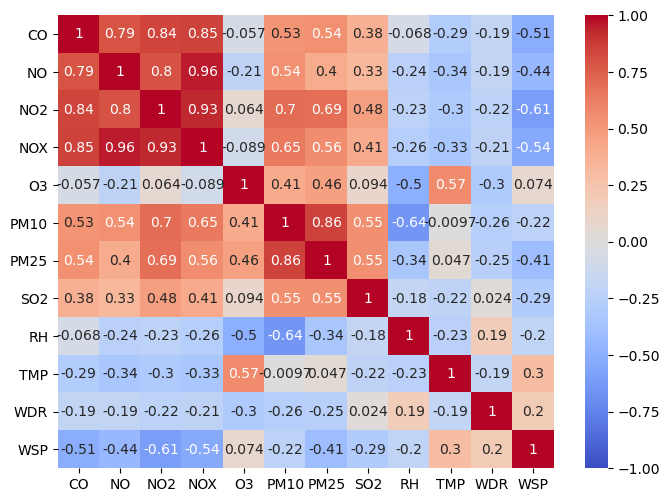

In [23]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(correlation_matrix1,annot=True,cmap='coolwarm',vmin=-1,vmax=1,center=0)

#### 5. Obtenga un Dataframe con las concentraciones promedio diarias de ozono por región en 2022 y un gráfico de la concentración promedio mensual por región.



<AxesSubplot:xlabel='RH', ylabel='PM10'>

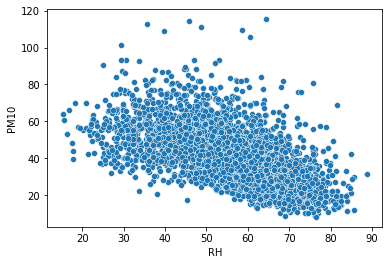

In [26]:
sns.scatterplot(x='RH',y='PM10',data=cm)

<AxesSubplot:xlabel='NO', ylabel='NOX'>

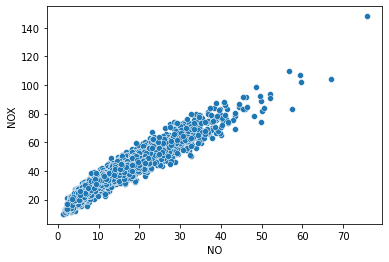

In [27]:
sns.scatterplot(x='NO',y='NOX',data=cm)

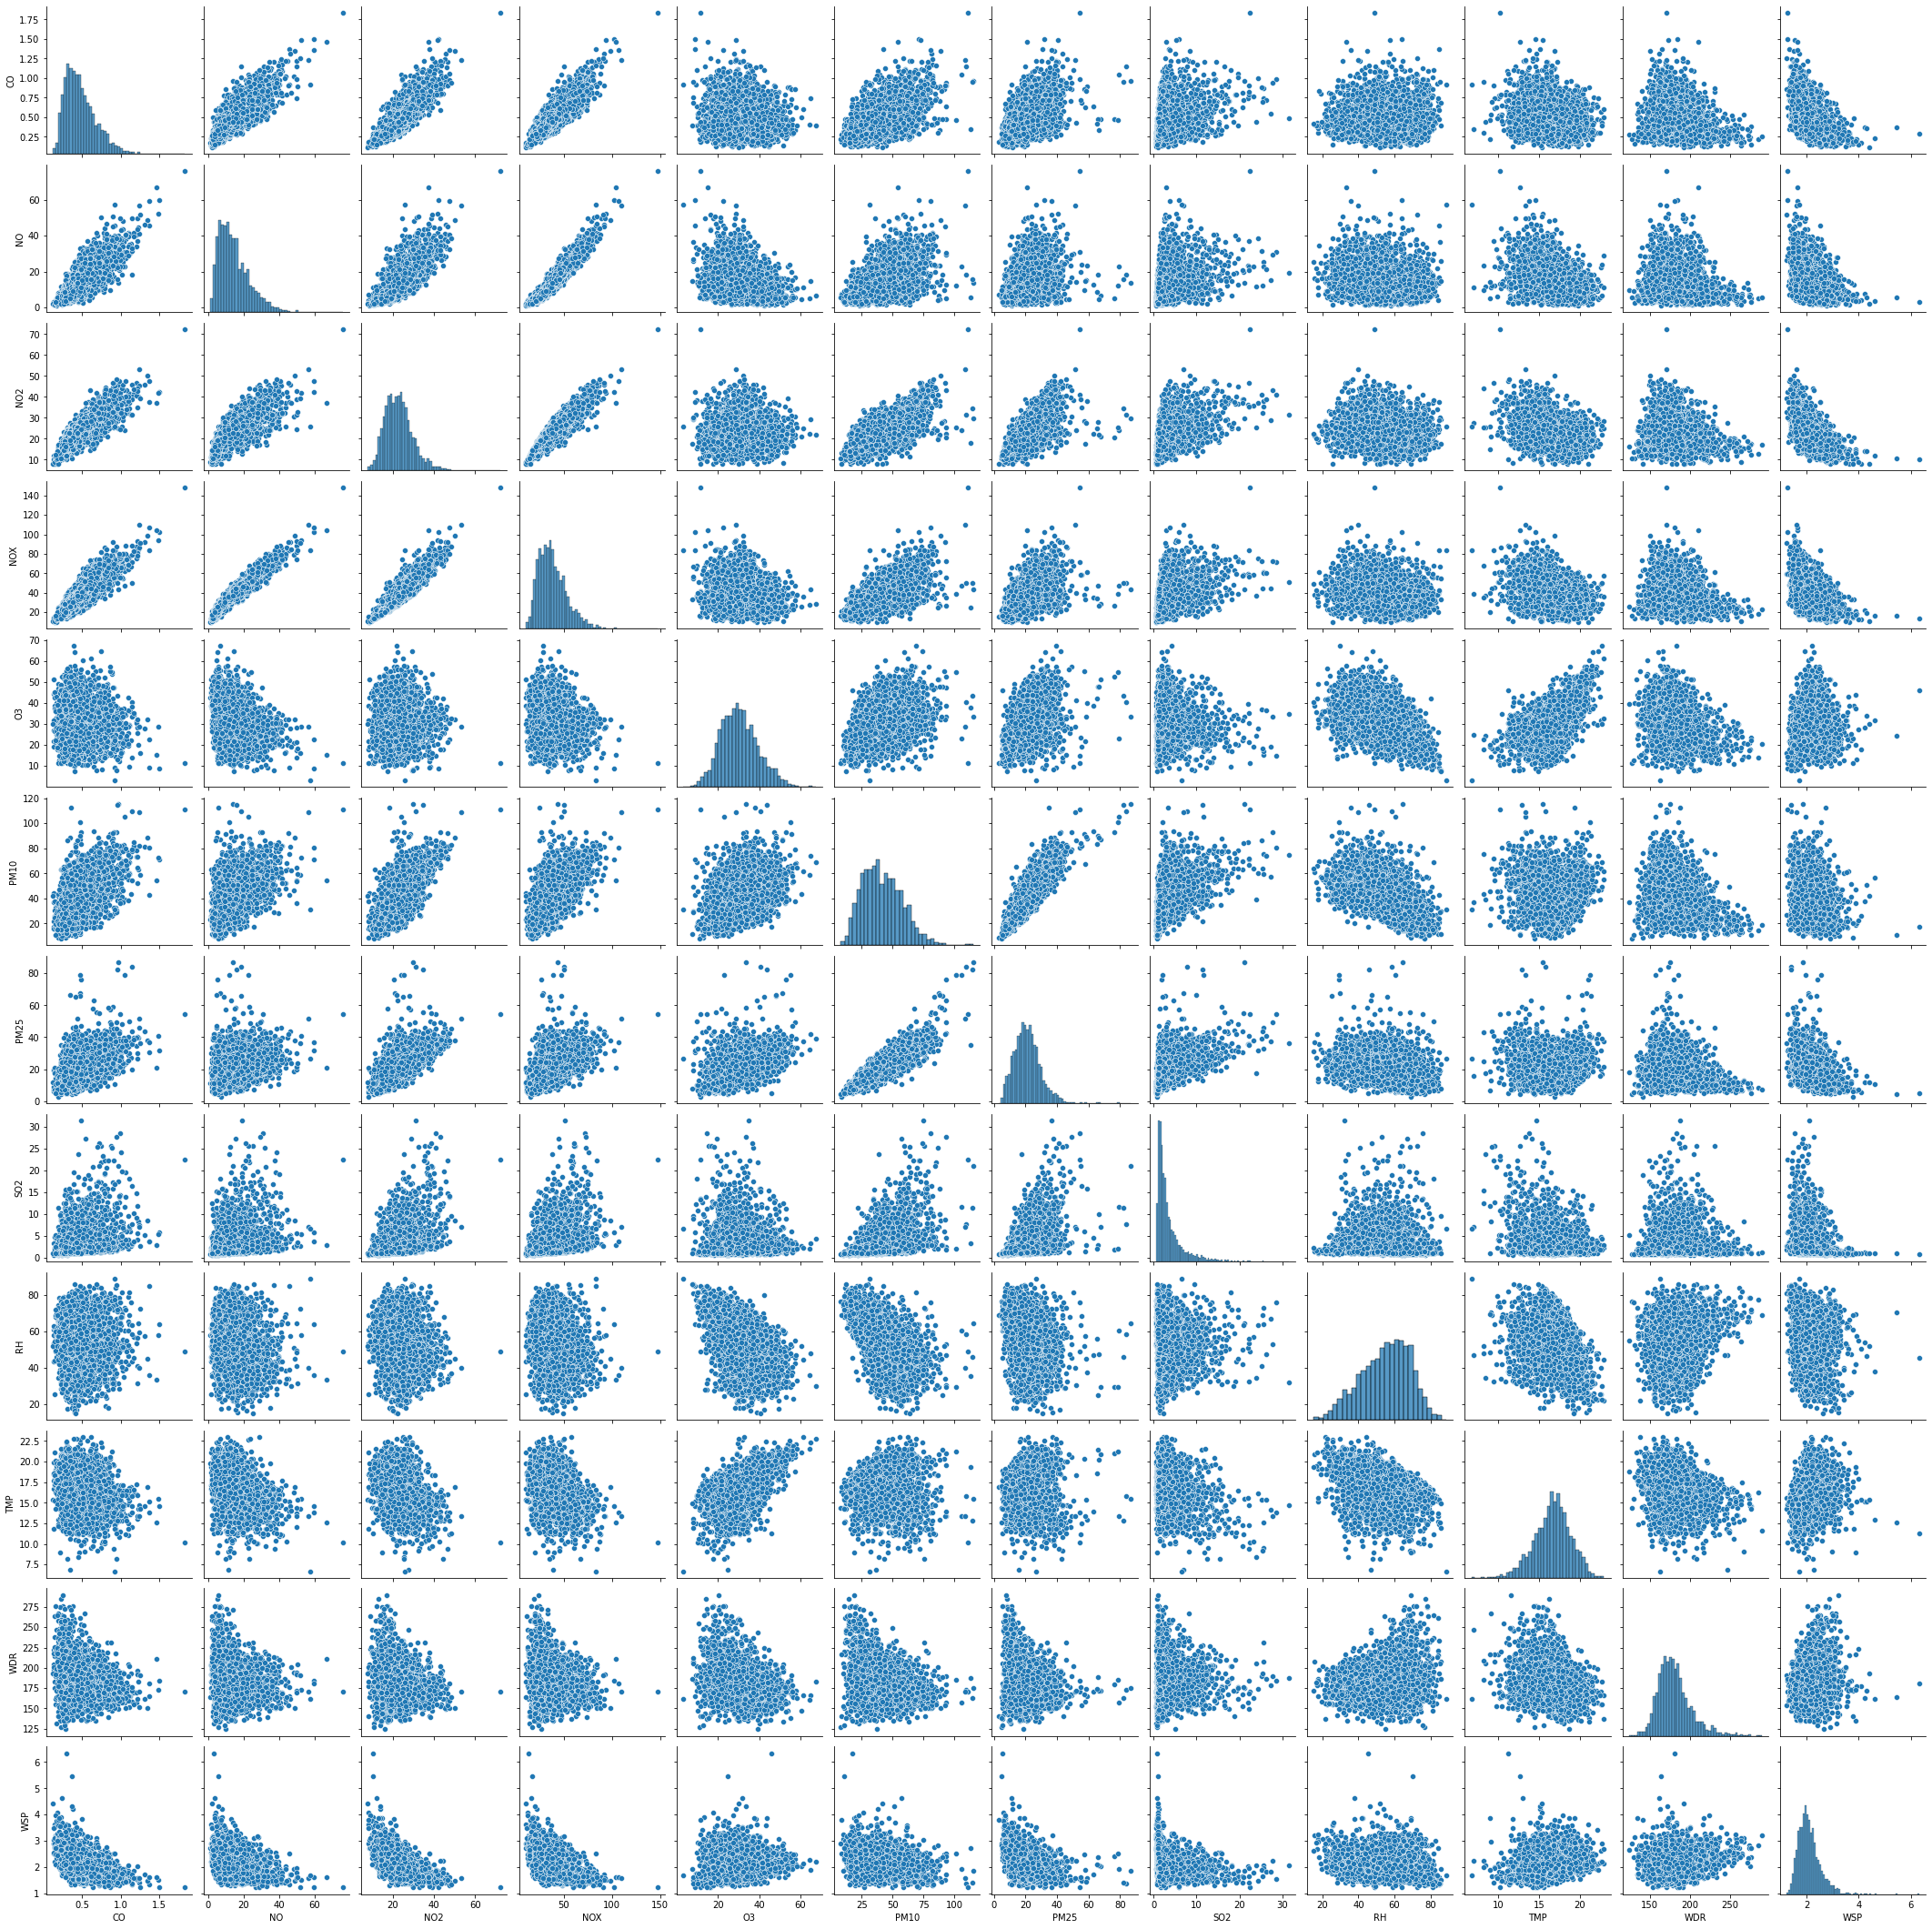

In [28]:
sns.pairplot(cm)

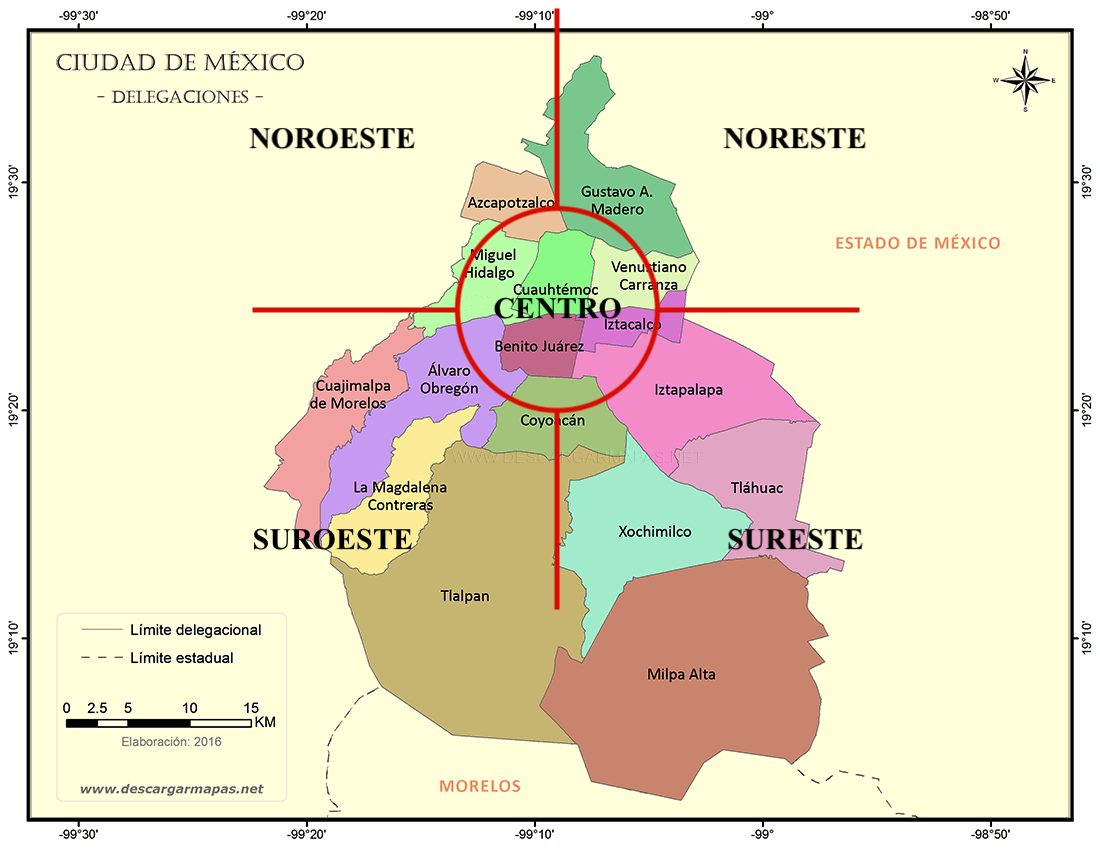

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
indice_22 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2022.csv",parse_dates = True, index_col=0)
indice_23 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/indice_2023.csv",parse_dates = True, index_col=0)